/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


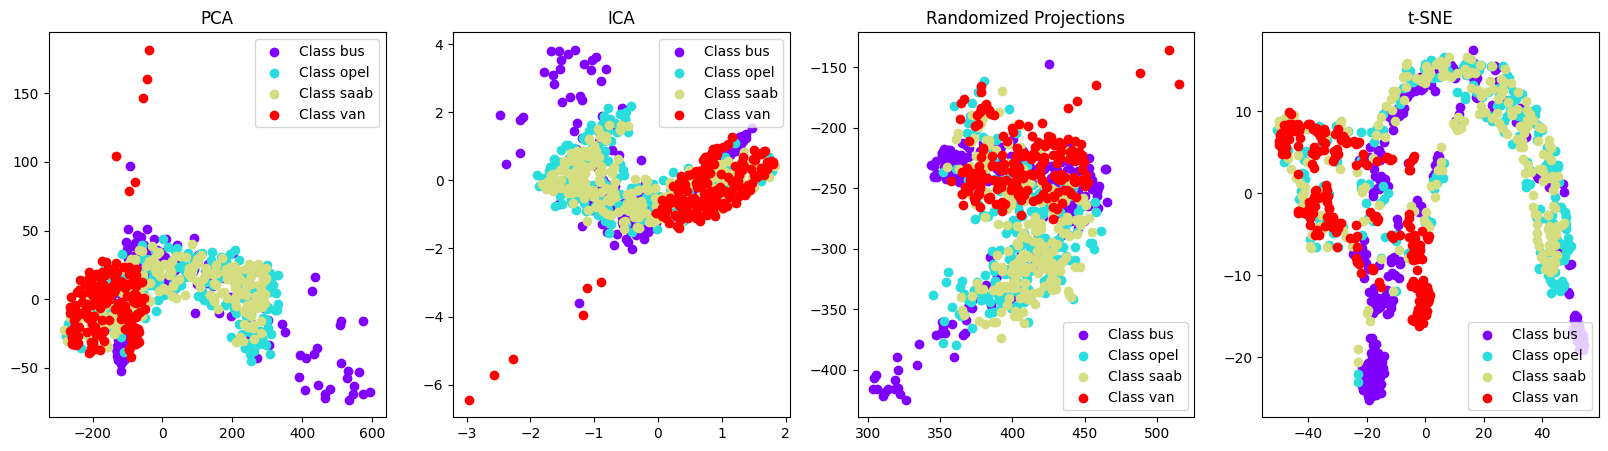

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE  # Import t-SNE
from sklearn.datasets import fetch_openml

# Load the Statlog dataset
vehicle = fetch_openml("vehicle")
X = vehicle.data
y = vehicle.target

# Initialize the PCA model with the desired number of components
pca = PCA(n_components=2)

# Fit and transform the data
pca_result = pca.fit_transform(X)

# Initialize the ICA model with the desired number of components
ica = FastICA(n_components=2)

# Fit and transform the data
ica_result = ica.fit_transform(X)

# Initialize the Randomized Projection model with the desired number of components
rp = GaussianRandomProjection(n_components=2)

# Fit and transform the data
rp_result = rp.fit_transform(X)

# Initialize t-SNE model with the desired number of components
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data using t-SNE
tsne_result = tsne.fit_transform(X)

# Separate data points by class labels
unique_labels = np.unique(y)

# Create a list of colors for each class
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot the results of each technique while distinguishing classes
plt.figure(figsize=(20, 5))

plt.subplot(141)
for label, color in zip(unique_labels, colors):
    plt.scatter(pca_result[y == label, 0], pca_result[y == label, 1], label=f'Class {label}', color=color)
plt.title("PCA")
plt.legend()

plt.subplot(142)
for label, color in zip(unique_labels, colors):
    plt.scatter(ica_result[y == label, 0], ica_result[y == label, 1], label=f'Class {label}', color=color)
plt.title("ICA")
plt.legend()

plt.subplot(143)
for label, color in zip(unique_labels, colors):
    plt.scatter(rp_result[y == label, 0], rp_result[y == label, 1], label=f'Class {label}', color=color)
plt.title("Randomized Projections")
plt.legend()

plt.subplot(144)
for label, color in zip(unique_labels, colors):
    plt.scatter(tsne_result[y == label, 0], tsne_result[y == label, 1], label=f'Class {label}', color=color)
plt.title("t-SNE")
plt.legend()

plt.show()


In [26]:
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the Statlog dataset
vehicle = fetch_openml("vehicle")
X = vehicle.data
y = vehicle.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Randomized Projection model with the desired number of components
n_components = 6
rp = GaussianRandomProjection(n_components=n_components)

# Fit and transform the training data
rp_result_train = rp.fit_transform(X_train)

# Transform the testing data
rp_result_test = rp.transform(X_test)

# Inverse transform to get the reconstructed data
rp_reconstructed_train = rp.inverse_transform(rp_result_train)
rp_reconstructed_test = rp.inverse_transform(rp_result_test)

# Calculate reconstruction error (MSE) for training and testing data
reconstruction_error_train = mean_squared_error(X_train, rp_reconstructed_train)
reconstruction_error_test = mean_squared_error(X_test, rp_reconstructed_test)

# Initialize a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Evaluate accuracy for Randomized Projections
clf.fit(rp_result_train, y_train)
y_pred_rp = clf.predict(rp_result_test)
accuracy_rp = accuracy_score(y_test, y_pred_rp)

# Print the reconstruction error and accuracy for Randomized Projections
print(f"Reconstruction Error for Randomized Projections (Training): {reconstruction_error_train:.2f}")
print(f"Reconstruction Error for Randomized Projections (Testing): {reconstruction_error_test:.2f}")
print(f"Accuracy for Randomized Projections: {accuracy_rp:.2f}")


Reconstruction Error for Randomized Projections (Training): 18059.74
Reconstruction Error for Randomized Projections (Testing): 18956.94
Accuracy for Randomized Projections: 0.62


/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


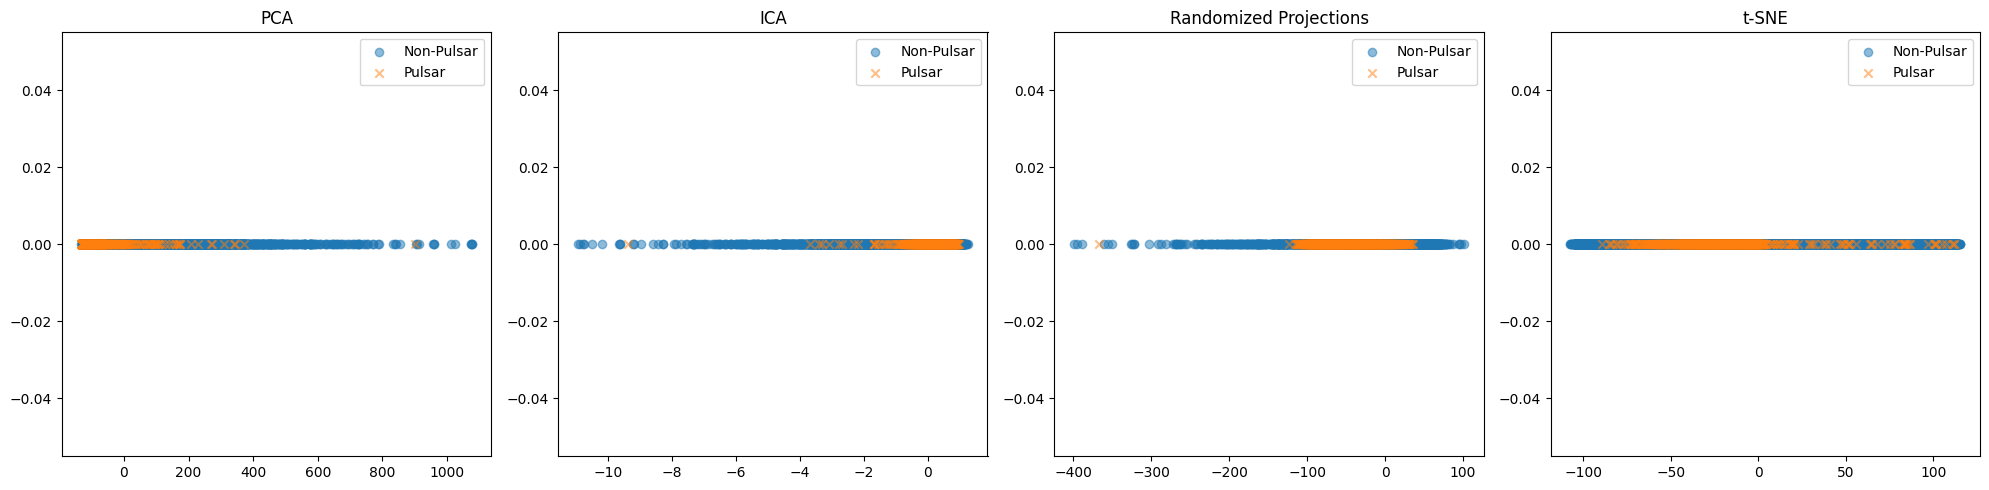

Accuracy for PCA: 1.00
Accuracy for ICA: 1.00
Accuracy for Randomized Projections: 1.00
Accuracy for t-SNE: 1.00
Eigenvalues for PCA components: [11635.68634325  1044.47678716]
Kurtosis values for ICA components: [17.17011709  7.63438563]
Reconstruction Error for Randomized Projections: 4167.49


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, mean_squared_error
from scipy.stats import kurtosis

# Load the HTRU2 dataset (replace 'htru2_dataset.csv' with your dataset file)
data = pd.read_csv('./data/HTRU_2.csv')

# Extract the features and labels
X = data.iloc[:, :-1]  # Exclude the last column
y = data.iloc[:, -1]  # The last column (0) is assumed to be the class label

# Initialize PCA, ICA, Randomized Projections, and t-SNE models
n_components = 2
pca = PCA(n_components=n_components)
ica = FastICA(n_components=n_components)
rp = GaussianRandomProjection(n_components=n_components)
tsne = TSNE(n_components=n_components)

# Apply dimensionality reduction
pca_result = pca.fit_transform(X)
ica_result = ica.fit_transform(X)
rp_result = rp.fit_transform(X)
tsne_result = tsne.fit_transform(X)

# Create a single figure with subplots for PCA, ICA, Randomized Projections, and t-SNE
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot PCA
axes[0].scatter(pca_result[y == 0, 0], np.zeros_like(pca_result[y == 0, 0]), label='Non-Pulsar', alpha=0.5, marker='o')
axes[0].scatter(pca_result[y == 1, 0], np.zeros_like(pca_result[y == 1, 0]), label='Pulsar', alpha=0.5, marker='x')
axes[0].set_title('PCA')
axes[0].legend()

# Plot ICA
axes[1].scatter(ica_result[y == 0, 0], np.zeros_like(ica_result[y == 0, 0]), label='Non-Pulsar', alpha=0.5, marker='o')
axes[1].scatter(ica_result[y == 1, 0], np.zeros_like(ica_result[y == 1, 0]), label='Pulsar', alpha=0.5, marker='x')
axes[1].set_title('ICA')
axes[1].legend()

# Plot Randomized Projections
axes[2].scatter(rp_result[y == 0, 0], np.zeros_like(rp_result[y == 0, 0]), label='Non-Pulsar', alpha=0.5, marker='o')
axes[2].scatter(rp_result[y == 1, 0], np.zeros_like(rp_result[y == 1, 0]), label='Pulsar', alpha=0.5, marker='x')
axes[2].set_title('Randomized Projections')
axes[2].legend()

# Plot t-SNE
axes[3].scatter(tsne_result[y == 0, 0], np.zeros_like(tsne_result[y == 0, 0]), label='Non-Pulsar', alpha=0.5, marker='o')
axes[3].scatter(tsne_result[y == 1, 0], np.zeros_like(tsne_result[y == 1, 0]), label='Pulsar', alpha=0.5, marker='x')
axes[3].set_title('t-SNE')
axes[3].legend()

plt.tight_layout()
plt.show()

# Initialize a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Evaluate accuracy for PCA on the original dataset
clf.fit(pca_result, y)
y_pred_pca = clf.predict(pca_result)
accuracy_pca = accuracy_score(y, y_pred_pca)

# Evaluate accuracy for ICA on the original dataset
clf.fit(ica_result, y)
y_pred_ica = clf.predict(ica_result)
accuracy_ica = accuracy_score(y, y_pred_ica)

# Evaluate accuracy for Randomized Projections on the original dataset
clf.fit(rp_result, y)
y_pred_rp = clf.predict(rp_result)
accuracy_rp = accuracy_score(y, y_pred_rp)

# Evaluate accuracy for t-SNE on the original dataset
clf.fit(tsne_result, y)
y_pred_tsne = clf.predict(tsne_result)
accuracy_tsne = accuracy_score(y, y_pred_tsne)

# Print the accuracies
print(f"Accuracy for PCA: {accuracy_pca:.2f}")
print(f"Accuracy for ICA: {accuracy_ica:.2f}")
print(f"Accuracy for Randomized Projections: {accuracy_rp:.2f}")
print(f"Accuracy for t-SNE: {accuracy_tsne:.2f}")

# Calculate eigenvalues for PCA
eigenvalues_pca = pca.explained_variance_

# Calculate kurtosis for ICA components
kurtosis_values_ica = kurtosis(ica_result, axis=0)

# Calculate reconstruction error for RP
rp_reconstructed = rp.inverse_transform(rp_result)
reconstruction_error_rp = mean_squared_error(X, rp_reconstructed)

# Print eigenvalues, kurtosis, and reconstruction error
print("Eigenvalues for PCA components:", eigenvalues_pca)
print("Kurtosis values for ICA components:", kurtosis_values_ica)
print(f"Reconstruction Error for Randomized Projections: {reconstruction_error_rp:.2f}")


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

# Load the HTRU2 dataset (replace 'htru2_dataset.csv' with your dataset file)
data = pd.read_csv('./data/HTRU_2.csv')
n_components = 2
# Extract the features and labels
X = data.iloc[:, :-1]  # Exclude the last column
y = data.iloc[:, -1]  # The last column (0) is assumed to be the class label


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the PCA model with the desired number of components
pca = PCA(n_components=n_components)

# Fit and transform the training data
pca_result_train = pca.fit_transform(X_train)

# Transform the testing data
pca_result_test = pca.transform(X_test)

# Initialize the ICA model with the desired number of components
ica = FastICA(n_components=n_components)

# Fit and transform the training data
ica_result_train = ica.fit_transform(X_train)

# Transform the testing data
ica_result_test = ica.transform(X_test)

# Initialize the Randomized Projection model with the desired number of components
rp = GaussianRandomProjection(n_components=n_components)

# Fit and transform the training data
rp_result_train = rp.fit_transform(X_train)

# Transform the testing data
rp_result_test = rp.transform(X_test)

# Initialize a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Evaluate accuracy for PCA
clf.fit(pca_result_train, y_train)
y_pred_pca = clf.predict(pca_result_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Evaluate accuracy for ICA
clf.fit(ica_result_train, y_train)
y_pred_ica = clf.predict(ica_result_test)
accuracy_ica = accuracy_score(y_test, y_pred_ica)

# Evaluate accuracy for Randomized Projections
clf.fit(rp_result_train, y_train)
y_pred_rp = clf.predict(rp_result_test)
accuracy_rp = accuracy_score(y_test, y_pred_rp)

# Print the accuracies
print(f"Accuracy for PCA: {accuracy_pca:.2f}")
print(f"Accuracy for ICA: {accuracy_ica:.2f}")
print(f"Accuracy for Randomized Projections: {accuracy_rp:.2f}")

Accuracy for PCA: 0.97
Accuracy for ICA: 0.97
Accuracy for Randomized Projections: 0.97


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Statlog dataset
# Replace 'statlog_dataset.csv' with the path to your Statlog dataset file
statlog_data = fetch_openml("vehicle")

# Load the HTRU2 dataset
# Replace 'htru2_dataset.csv' with the path to your HTRU2 dataset file
htru2_data = pd.read_csv('./data/HTRU_2.csv')

# Preprocess the datasets and split into features and labels

X_statlog = vehicle.data
y_statlog = vehicle.target

X_htru2 = htru2_data.iloc[:, :-1]
y_htru2 = htru2_data.iloc[:, -1]

# Split the datasets into training and testing sets
X_statlog_train, X_statlog_test, y_statlog_train, y_statlog_test = train_test_split(X_statlog, y_statlog, test_size=0.2, random_state=42)
X_htru2_train, X_htru2_test, y_htru2_train, y_htru2_test = train_test_split(X_htru2, y_htru2, test_size=0.2, random_state=42)

# Train Random Forest classifiers
rf_statlog = RandomForestClassifier(random_state=42)
rf_statlog.fit(X_statlog_train, y_statlog_train)

rf_htru2 = RandomForestClassifier(random_state=42)
rf_htru2.fit(X_htru2_train, y_htru2_train)

# Make predictions on test data
y_statlog_pred = rf_statlog.predict(X_statlog_test)
y_htru2_pred = rf_htru2.predict(X_htru2_test)

# Evaluate the models
accuracy_statlog = accuracy_score(y_statlog_test, y_statlog_pred)
accuracy_htru2 = accuracy_score(y_htru2_test, y_htru2_pred)

print(f"Accuracy for Statlog dataset: {accuracy_statlog:.2f}")
print(f"Accuracy for HTRU2 dataset: {accuracy_htru2:.2f}")

# Plot the results
# You can create plots to visualize predictions and actual class labels as needed
# For example, you can create confusion matrices or ROC curves for both datasets.


/home/kh/app/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/kh/app/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy for Statlog dataset: 0.77
Accuracy for HTRU2 dataset: 0.98
